## Audio transforms and augmentations
- This tutorial demonstrates examples for audio tranformations in `tonic.audio_augmentations`
- A sample audio file is chosen from torch tutorials and all transforms are applied on that

In [1]:
import warnings
warnings.filterwarnings('ignore')
import IPython
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio
from torchaudio.utils import download_asset

SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
sample_audio, sample_rate = torchaudio.load(SAMPLE_WAV)
sample_audio = sample_audio.numpy()
original_sample_length = int(np.ceil(np.shape(sample_audio)[1]/sample_rate))
IPython.display.display(IPython.display.Audio(sample_audio, rate = sample_rate))


### RandomTimeStretch
- Slowing down
- Speeding up

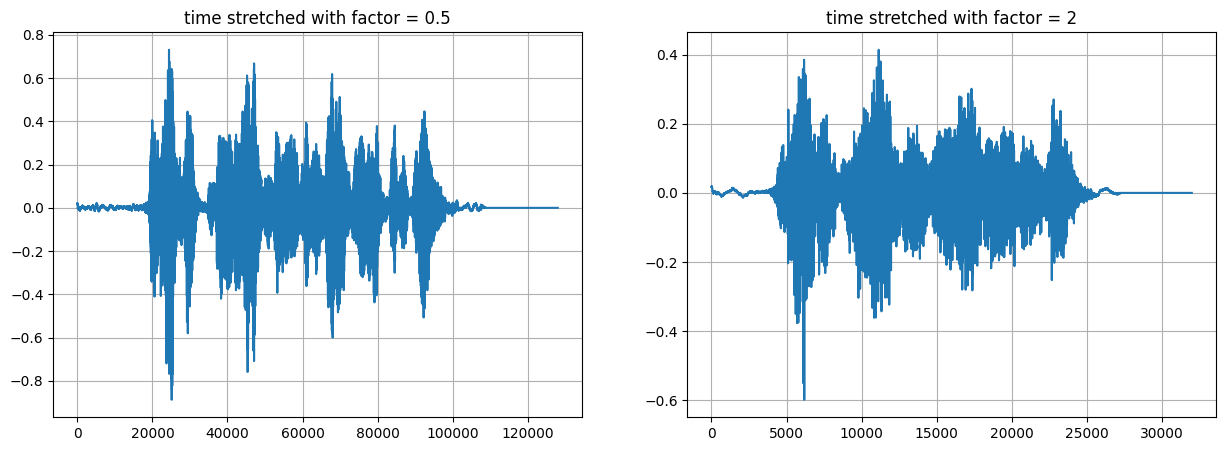

In [5]:
from tonic.audio_augmentations import RandomTimeStretch
plt.figure(figsize = (15, 5))

#### slowing down
factors = [0.5]
# the passed sample length can be the original one, here we change it just to show the longer (slowed down) version
sample_length = int(float(original_sample_length)/factors[0])
aug = RandomTimeStretch(samplerate = sample_rate, sample_length = sample_length, factors = factors)
slowed = aug(sample_audio)
plt.subplot(121); plt.plot(slowed[0]); 
plt.grid(True); plt.title('time stretched with factor = ' + str(factors[0]))
IPython.display.display(IPython.display.Audio(slowed, rate = sample_rate))

#### speeding up 
factors = [2] # speeding up
sample_length = int(float(original_sample_length)/factors[0])

aug = RandomTimeStretch(samplerate = sample_rate, sample_length = sample_length, factors = factors)
speed_up = aug(sample_audio)
plt.subplot(122); plt.plot(speed_up[0]); 
plt.grid(True); plt.title('time stretched with factor = ' + str(factors[0]))
IPython.display.display(IPython.display.Audio(speed_up, rate = sample_rate))

### RandomPitchShift
- Decreasing the pitch 
- Increasing the pitch 

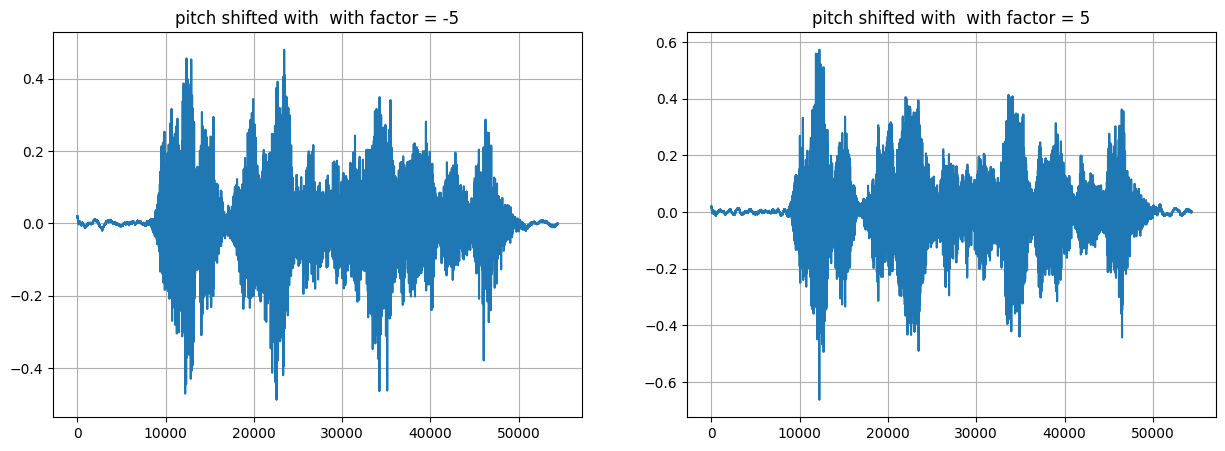

In [6]:
from tonic.audio_augmentations import RandomPitchShift
plt.figure(figsize = (15, 5));

#### decreasing the pitch
factors = [-5] 
aug = RandomPitchShift(samplerate = sample_rate, factors = factors)
augmented = aug(sample_audio)
plt.subplot(121); plt.plot(augmented[0]); 
plt.grid(True); plt.title('pitch shifted with  with factor = ' + str(factors[0]))
IPython.display.display(IPython.display.Audio(augmented, rate = sample_rate))
#### increasing the pitch
factors = [5] 
aug = RandomPitchShift(samplerate = sample_rate, factors = factors)
augmented = aug(sample_audio)
plt.subplot(122);plt.plot(augmented[0]); 
plt.grid(True); plt.title('pitch shifted with  with factor = ' + str(factors[0]))
IPython.display.display(IPython.display.Audio(augmented, rate = sample_rate))

### AmplitudeScale
- Lowering the volume

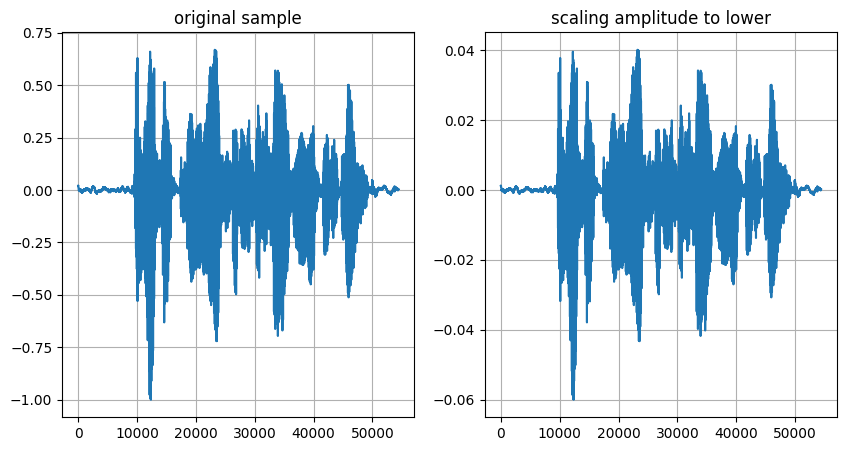

In [9]:
from tonic.audio_augmentations import RandomAmplitudeScale
plt.figure(figsize = (10, 5));
plt.subplot(121); plt.plot(sample_audio[0]); 
plt.grid(True); plt.title('original sample'); 

aug_low = RandomAmplitudeScale(min_amp = 0.02, max_amp = 0.2, samplerate=sample_rate)
low = aug_low(sample_audio)

plt.subplot(122); plt.plot(low[0]); 
plt.grid(True); plt.title('scaling amplitude to lower')

IPython.display.display(IPython.display.Audio(low[0], rate = sample_rate, normalize=False))#lower volume


### Add_WhiteNoise

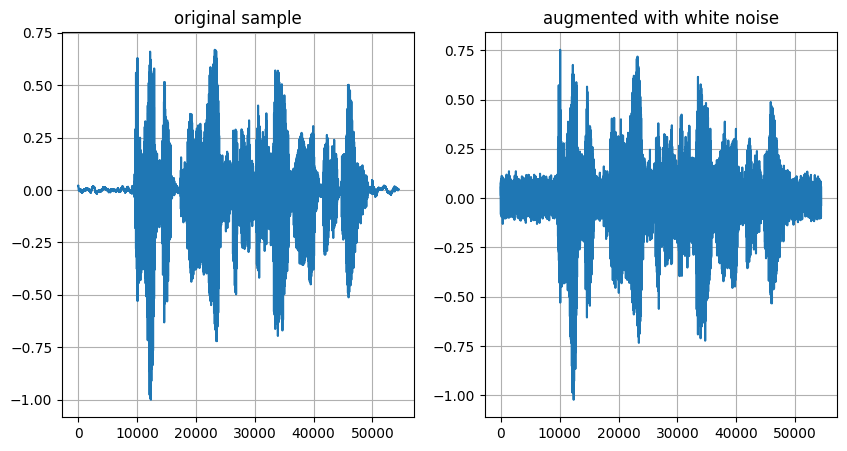

In [10]:
from tonic.audio_augmentations import AddWhiteNoise
plt.figure(figsize = (10, 5));
plt.subplot(121); plt.plot(sample_audio[0]); 
plt.grid(True); plt.title('original sample'); 

aug = AddWhiteNoise(samplerate=sample_rate)
noisy = aug(sample_audio)
plt.subplot(122); plt.plot(noisy[0]); 
plt.grid(True); plt.title('augmented with white noise' ); 

IPython.display.display(IPython.display.Audio(sample_audio, rate = sample_rate, normalize=True))# the original
IPython.display.display(IPython.display.Audio(noisy[0], rate = sample_rate, normalize=True))#


### RIR (room impulse response)

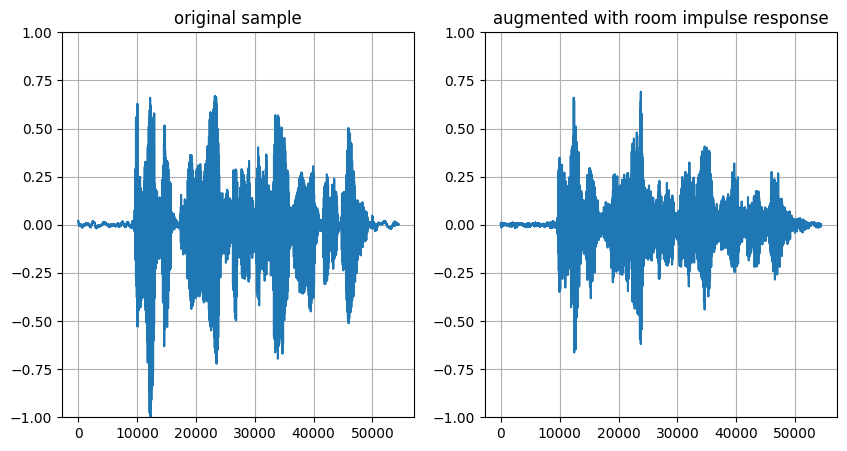

In [15]:
from tonic.audio_augmentations import RIR
import numpy as np
plt.figure(figsize = (10, 5));
plt.subplot(121); plt.plot(sample_audio[0]); 
plt.grid(True); plt.title('original sample'); 
plt.ylim([-1, 1])
rir_audio_path = (
        "tutorial-assets/Lab41-SRI-VOiCES-rm1-impulse-mc01-stu-clo-8000hz.wav"
    )
aug = RIR(samplerate=sample_rate, rir_audio=rir_audio_path)
rir = aug(sample_audio)
plt.subplot(122); plt.plot(rir[0]); 
plt.grid(True); plt.title('augmented with room impulse response' ); 
plt.ylim([-1, 1])
IPython.display.display(IPython.display.Audio(sample_audio, rate = sample_rate, normalize=True))# the original
IPython.display.display(IPython.display.Audio(rir[0], rate = sample_rate, normalize=True))#